In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from TinyNN.Value import Value
from TinyNN.MLP import  MLP

from sklearn.datasets import make_moons, make_blobs

np.random.seed(48)
random.seed(48)

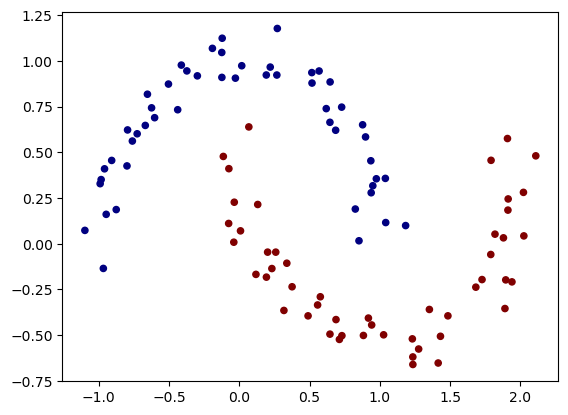

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [10]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network

In [11]:
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 0*1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.5246151047506563, grad=0) 0.82


In [12]:
for k in range(50):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
        
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.5246151047506563, accuracy 82.0%
step 1 loss 2.9640187395738047, accuracy 50.0%
step 2 loss 0.4388533102006574, accuracy 83.0%
step 3 loss 0.3108033017059049, accuracy 87.0%
step 4 loss 0.2780416806757041, accuracy 89.0%
step 5 loss 0.2541930919744842, accuracy 89.0%
step 6 loss 0.23475695400823643, accuracy 90.0%
step 7 loss 0.21749145153499355, accuracy 91.0%
step 8 loss 0.2050933554615366, accuracy 91.0%
step 9 loss 0.20390163769855832, accuracy 92.0%
step 10 loss 0.20367399063883734, accuracy 91.0%
step 11 loss 0.32692519424717703, accuracy 91.0%
step 12 loss 0.3301090134827478, accuracy 90.0%
step 13 loss 0.43653521694343267, accuracy 87.0%
step 14 loss 0.23077171342734615, accuracy 90.0%
step 15 loss 0.20807099519997616, accuracy 91.0%
step 16 loss 0.18475153533341018, accuracy 92.0%
step 17 loss 0.1745551897395602, accuracy 94.0%
step 18 loss 0.16533341083684328, accuracy 93.0%
step 19 loss 0.15182049026261288, accuracy 93.0%
step 20 loss 0.14090781691786655, accur

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()